In [3]:
import h5py

In [1]:
import xxzchain as xxz
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [2]:
test = xxz.load_system('test/lattice21')

#N_k = test.get_data('N_k')
#n_k = test.get_data('n_k')
#init_state = test.get_operator("H_ini").get_eigenstates(test.get_basis(7,0))
#energy = test.get_operator("H_fin").expectation(test.get_operator("H_ini").get_eigenstates(test.get_basis(7,0)))

Current system loaded by "C:\Users\jeong\master\xxzchain\test\lattice21.hdf5"
Hardcore boson system
Name         : lattice21
Saved path   : C:\Users\jeong\master\xxzchain\C
System size  : 21

Referenced Basis :   (None means full)
	|- Sector [-1 -1  0  0] 
	-----

Defined Operators :
	|- H_fin
	|- H_fin1
	|- H_fin2
	|- H_fin3
	|- H_fins
	|- H_ini
	|- H_ini1
	|- ...
	-----
	Hamiltonian  : 'H_fin3'

Stored Data :
	|- E_can
	|- E_set
	|- Hcoef
	|- N_diag
	|- N_diags
	|- N_k
	|- N_k0
	|- N_ks
	|- N{}
	|- beta
	|- n_a
	|- n_diag
	|- n_diags
	|- n_k
	|- n_k0
	|- n_ks
	|- n{}
	-----



In [3]:
def partition_f(H,beta):
    return np.exp(-H*beta)

def temper(func, beta):
    def wrapper(x):
        return func(x,beta)
    return wrapper

In [4]:
nn_ini = xxz.Operator.Null(test)
for i in test.range:
    nn_ini += -0.5*test.get_operator("hopping").index(i,i+1)+2.0*(test.get_operator("n_i").index(i)-1/2)@(test.get_operator("n_i").index(i+1)-1/2)
nn_ini.set_name('nn_ini')
nn_ini.set_default(False)

In [5]:
nn_fin = xxz.Operator.Null(test)
for i in test.range:
    nn_fin += -1.0*test.get_operator("hopping").index(i,i+1)+1.0*(test.get_operator("n_i").index(i)-1/2)@(test.get_operator("n_i").index(i+1)-1/2)
nn_fin.set_name('nn_fin')
nn_fin.set_default(False)

In [6]:
Hcoef = [0.06,0.02,0.04,0.08,0.16,0.32,0.48]

In [7]:
nnn = xxz.Operator.Null(test)
for i in test.range:
    nnn += -1*test.get_operator("hopping").index(i,i+2)+1.0*(test.get_operator("n_i").index(i)-1/2)@(test.get_operator("n_i").index(i+2)-1/2)
nnn.set_name('nnn')
nnn.set_default(False)

In [18]:
Hcoef = test.get_data('Hcoef')

In [8]:
Hinis = xxz.OperatorGroup(test, 'Hinis')
Hinis.set_name('Hinis')

In [9]:
Hfins = xxz.OperatorGroup(test, 'Hfins')
Hfins.set_name('Hfins')

In [10]:
for c in Hcoef:
    Hinis[c] = nn_ini + c*nnn
    Hfins[c] = nn_fin + c*nnn

In [25]:
test.saver.ls('operator/H_inis')

/operator/H_inis : dir
	H_inis.0.02
	H_inis.0.04
	H_inis.0.06
	H_inis.0.08
	H_inis.0.16
	H_inis.0.32
	H_inis.0.48


In [30]:
test.saver.ls('basis/(7,0,0,0)/')

/basis/(7,0,0,0) : dir
	/basis/(7,0,0,0)/H_fin : dir
	/basis/(7,0,0,0)/H_fin1 : dir
	/basis/(7,0,0,0)/H_fin2 : dir
	/basis/(7,0,0,0)/H_fin3 : dir
	/basis/(7,0,0,0)/H_ini : dir
	/basis/(7,0,0,0)/H_ini1 : dir
	/basis/(7,0,0,0)/H_ini2 : dir
	/basis/(7,0,0,0)/H_ini3 : dir
	/basis/(7,0,0,0)/Hfins.0.02 : dir
	/basis/(7,0,0,0)/Hfins.0.04 : dir
	/basis/(7,0,0,0)/Hfins.0.06 : dir
	/basis/(7,0,0,0)/Hfins.0.08 : dir
	/basis/(7,0,0,0)/Hfins.0.16 : dir
	/basis/(7,0,0,0)/Hfins.0.32 : dir
	/basis/(7,0,0,0)/Hfins.0.48 : dir
	/basis/(7,0,0,0)/Hinis.0.02 : dir
	/basis/(7,0,0,0)/Hinis.0.04 : dir
	/basis/(7,0,0,0)/Hinis.0.06 : dir
	/basis/(7,0,0,0)/Hinis.0.08 : dir
	/basis/(7,0,0,0)/Hinis.0.16 : dir
	/basis/(7,0,0,0)/Hinis.0.32 : dir
	/basis/(7,0,0,0)/Hinis.0.48 : dir
	address
	distance
	period
	state
	state_set


In [134]:
test.save()

RuntimeError: Unable to create link (name already exists)

In [56]:
Hinis[6].get_eigenvalue(test.get_basis(7,0))

array([-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98])

In [45]:
Hinis._index

{}

In [12]:
Hinis, Hfins = test.get_operator('Hinis'), test.get_operator("Hfins")

In [13]:
Hinis._index

{0: '0.06', 1: '0.02', 2: '0.04', 3: '0.08', 4: '0.16', 5: '0.32', 6: '0.48'}

In [136]:
ini.name

'Hinis.0.48'

In [137]:
for ini, fin in zip(Hinis, Hfins):
    del test.saver['basis/(7,{},0,0)/{}'.format(0, ini.name)]
    ini.get_eigenvalue(test.get_basis(7,0))


Initializing.... it may takes few minutes.


KeyboardInterrupt: 

In [17]:
xxz.preset(test, globals())

same operator name exist. set_name() please.
same operator name exist. set_name() please.
same operator name exist. set_name() please.
same operator name exist. set_name() please.


In [5]:
H_ini1 = xxz.Operator.Null(test)
t = 0.5
V = 2.0
t_ = 0.12
V_ = 0.12
for i in test.range:
    H_ini1 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
    H_ini1 += -t_*hopping.index(i,i+2)+V_*(n_i.index(i)-1/2)@(n_i.index(i+2)-1/2)
H_ini1.set_name("H_ini1")

H_ini2 = xxz.Operator.Null(test)
t = 0.5
V = 2.0
t_ = 0.03
V_ = 0.03
for i in test.range:
    H_ini2 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
    H_ini2 += -t_*hopping.index(i,i+2)+V_*(n_i.index(i)-1/2)@(n_i.index(i+2)-1/2)
H_ini2.set_name("H_ini2")

H_ini3 = xxz.Operator.Null(test)
t = 0.5
V = 2.0
for i in test.range:
    H_ini3 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
H_ini3.set_name("H_ini3")

H_fin1 = xxz.Operator.Null(test)
t = 1.0
V = 1.0
t_ = 0.12
V_ = 0.12
for i in test.range:
    H_fin1 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
    H_fin1 += -t_*hopping.index(i,i+2)+V_*(n_i.index(i)-1/2)@(n_i.index(i+2)-1/2)
H_fin1.set_name("H_fin1")

H_fin2 = xxz.Operator.Null(test)
t = 1.0
V = 1.0
t_ = 0.03
V_ = 0.03
for i in test.range:
    H_fin2 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
    H_fin2 += -t_*hopping.index(i,i+2)+V_*(n_i.index(i)-1/2)@(n_i.index(i+2)-1/2)
H_fin2.set_name("H_fin2")

H_fin3 = xxz.Operator.Null(test)
t = 1.0
V = 1.0
for i in test.range:
    H_fin3 += -t*hopping.index(i,i+1)+V*(n_i.index(i)-1/2)@(n_i.index(i+1)-1/2)
    #H_fin1 += -t_*hopping.index(i,i+2)+V_*(n_i.index(i)-1/2)@(n_i.index(i+2)-1/2)
H_fin3.set_name("H_fin3")

In [19]:
n = xxz.OperatorGroup(test,'n')
n.set_name('n')
for k in test.range:
    temp = xxz.Operator.Null(test)
    for i in test.range:
        for j in test.range:
            temp += np.exp(-1j*k*2*np.pi*(i-j)/test.size)/test.size*b_i_dag.index(i)@b_i.index(j)
    n[k] = temp

same operator name exist. set_name() please.


In [20]:
N = xxz.OperatorGroup(test, 'N')
for k in test.range:
    temp = xxz.Operator.Null(test)
    for i in test.range:
        for j in test.range:
            temp += np.exp(-1j*2*k*np.pi*(i-j)/test.size)/test.size*n_i.index(i)@n_i.index(j)
    N[k] = temp

In [21]:
test.save()

In [60]:
oHfins = [test.get_operator('H_fin{}'.format(i)) for i in range(1,4)]

In [61]:
oHfins.insert(0, test.get_operator('H_fin'))

In [63]:
energys = [[]for i in range(4)]
for i,fins in enumerate(oHfins):
    for k in range(test.size):
        for e in fins.get_eigenvalue(test.get_basis(7,k)):
            energys[i].append(e)

energys = np.array(energys)

eff_Ts = [[] for i in range(4)]
E_sets = [[] for i in range(4)]

for i in range(2):
    beta = 1/3*(i+1)
    partition = temper(partition_f,beta)
    Z = [partition(energys[j]).sum() for j in range(4)]
    for hi in range(4):
        eff_Ts[hi].append(1/beta)
        E_sets[hi].append((energys[hi]*partition(energys[hi])/Z[hi]).sum())

Energys = []
for hi,hf in zip(Hinis,Hfins):
    Energys.append(hf.expectation(hi.get_eigenstates(test.get_basis(7,0))))

In [64]:
E_sets

[[-3.853686973319782, -8.003947901405713],
 [-3.576442250140197, -7.273986244627481],
 [-3.436666389091025, -6.839020797073314],
 [-3.4029336835835804, -6.716062828543377]]

In [22]:
energys = []
for i,fins in enumerate(Hfins):
    energys.append([])
    for k in range(test.size):
        for e in fins.get_eigenvalue(test.get_basis(7,k)):
            energys[i].append(e)

energys = np.array(energys)

eff_Ts = [[] for i in range(len(Hfins))]
E_sets = [[] for i in range(len(Hfins))]

for beta in [1/3,1/2]:
    partition = temper(partition_f,beta)
    Z = [partition(energys[j]).sum() for j in range(len(Hfins))]
    for hi in range(len(Hfins)):
        eff_Ts[hi].append(1/beta)
        E_sets[hi].append((energys[hi]*partition(energys[hi])/Z[hi]).sum())

In [59]:
Energys = []
for hi,hf in zip(Hinis,Hfins):
    Energys.append(hf.expectation(hi.get_eigenstates(test.get_basis(7,0))))

In [26]:
energys

array([[-13.21171619, -11.8193679 , -10.72420534, ...,   8.73127223,
          8.93502151,   9.15140762],
       [ -1.02      ,  -1.02      ,  -1.02      , ...,   8.90275602,
          9.13260978,   9.36455059],
       [ -1.04      ,  -1.04      ,  -1.04      , ...,   8.81635334,
          9.03345273,   9.25732646],
       ...,
       [ -1.16      ,  -1.16      ,  -1.16      , ...,   8.32778373,
          8.45488516,   8.64394962],
       [ -1.32      ,  -1.32      ,  -1.32      , ...,   7.75093817,
          7.78351509,   7.9373643 ],
       [ -1.48      ,  -1.48      ,  -1.48      , ...,   7.64955509,
          7.65881761,   7.71693152]])

In [78]:
Hfins[0].coef.shape

(105,)

In [24]:
Hcoef

[0.06, 0.02, 0.04, 0.08, 0.16, 0.32, 0.48]

In [23]:
E_sets

[[-3.4768100946020093, -5.339349083805162],
 [-3.3252521835122635, -5.117452323612232],
 [-3.349054947938319, -5.170504539003451],
 [-3.4049680687001485, -5.288642936828657],
 [-3.5502030349968607, -5.573017258835767],
 [-3.975407187303789, -6.332141616453549],
 [-4.5813461823335615, -7.336154551623014]]

In [149]:
np.array([]).sum()

0.0

In [158]:
energys = [[]for i in range(4)]
for i,fins in enumerate(Hfins):
    for k in range(test.size):
        for e in fins.get_eigenvalue(test.get_basis(7,k)):
            energys[i].append(e)

energys = np.array(energys)

In [174]:
neff_Ts = [[] for i in range(4)]
nE_sets = [[] for i in range(4)]

for i in range(100):
    beta = 1/3*(i+1)
    partition = temper(partition_f,beta)
    Z = [0 for j in range(4)]
    for j in range(4):
        ge = energys[j].min()/beta
        eset = energys[j]/beta
        Z[j]+=partition(energys[j][eset>=ge+32]).sum()
        Z[j]+=partition(energys[j][np.logical_and(eset>=ge+24,eset<ge+32)]).sum()
        
        Z[j]+=partition(energys[j][np.logical_and(eset>=ge+16,eset<ge+24)]).sum()
        Z[j]+=partition(energys[j][np.logical_and(eset>=ge+8,eset<ge+16)]).sum()
        Z[j]+=partition(energys[j][eset<ge+8]).sum()
        neff_Ts[j].append(1/beta)
        bf = energys[j]*partition(energys[j])/Z[j]
        nE_sets[j].append(bf.sum())
'''for hi in range(4):
eff_Ts[hi].append(1/beta)
E_sets[hi].append((energys[hi]*partition(energys[hi])/Z[hi]).sum())'''

'for hi in range(4):\neff_Ts[hi].append(1/beta)\nE_sets[hi].append((energys[hi]*partition(energys[hi])/Z[hi]).sum())'

In [42]:
Energys = []
for hi,hf in zip(Hinis,Hfins):
    Energys.append(hf.expectation(hi.get_eigenstates(test.get_basis(7,0))))

In [48]:
Energys[1]

array([ 4.315+0.j,  3.315+0.j,  3.295+0.j, ..., -1.745+0.j, -1.765+0.j,
       -1.785+0.j])

In [184]:
nE_sets[3][0]

-3.40293368358358

In [32]:
Hcoef

[0.06, 0.02, 0.04, 0.08, 0.16, 0.32, 0.48]

In [31]:
E_sets

[[-3.4768100946020093, -5.339349083805162],
 [-3.3252521835122635, -5.117452323612232],
 [-3.349054947938319, -5.170504539003451],
 [-3.4049680687001485, -5.288642936828657],
 [-3.5502030349968607, -5.573017258835767],
 [-3.975407187303789, -6.332141616453549],
 [-4.5813461823335615, -7.336154551623014]]

In [186]:
E_sets[3][0]

-3.4029336835835804

In [30]:
[Energys[i][index[i]] for i in range(len(Hcoef))]

NameError: name 'index' is not defined

In [63]:
j = 0
E = [[10 for i in range(len(Hcoef))] for i in range(2)]
index = [[0 for i in range(len(Hcoef))] for i in range(2)]
for energy in Energys:
    for i,e in enumerate(energy):
        if E[0][j]>abs(e-E_sets[j][0]):
            E[0][j] = abs(e-E_sets[j][0])
            index[0][j] = i
        if E[1][j]>abs(e-E_sets[j][1]):
            E[1][j] = abs(e-E_sets[j][1])
            index[1][j] = i
    j+=1

In [64]:
E

[[0.0016974587018143694,
  0.0004145014469774111,
  5.176707556930893e-05,
  0.0014239771774815502,
  0.001033446315316322,
  0.001337922465053154,
  0.006091883772573858],
 [0.0033795104546303634,
  0.00012262043871746897,
  0.0013513417264627847,
  0.0020162483559555966,
  0.0021369866232392454,
  0.0008161980436751648,
  0.003041663230815672]]

In [66]:
n_diags = test.get_data('n_diags')

In [96]:
np.array([1,2,3,4]).reshape(-1,1)[0,0]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [87]:
n[0]

In [76]:
microwindow = [[[[] for k in test.range] for i in range(len(Hfins))] for i in range(2)]

for k in test.range:
    j = 0
    for hfin in Hfins:
        for i,e in enumerate(hfin.get_eigenvalue(test.get_basis(7,k))):
            if abs(e-E_sets[j][0])<0.1:
                microwindow[0][j][k].append(i)
            if abs(e-E_sets[j][1])<0.1:
                microwindow[1][j][k].append(i)

        j+=1

In [104]:
n_diag = []
N_diag = []
n_micro = []
N_micro = []
ch = 0
for hini,hfin in zip(Hinis,Hfins):
    #setting systems hamiltonian
    test.Hamiltonian = hfin
    # get initial state for T = 3.0, T= 2.0 respectively.
    initial = hini.get_eigenstates(test.get_basis(7,0))[[index[0][ch],index[1][ch]]]
    #micro_temp = [[[[] for k in test.range] for i in range(2)] for j in range(2)] # index order = (n,N),T, momentum sector
    diag_temp = [[[[] for k in test.range] for i in range(2)] for j in range(2)]
    for k, O in enumerate(zip(n,N)):     # for n(k), N(k)
        nk,Nk = O
        nk_diag = nk.get_matrix(initial.basis, eigen = True)[np.diag_indices(len(initial.basis))]
        Nk_diag = Nk.get_matrix(initial.basis, eigen = True)[np.diag_indices(len(initial.basis))]
        diagv = (initial.eigencoef*initial.eigencoef.conjugate()).T @ nk_diag.reshape(-1,1) 
        diag_temp[0][0][k].append(diagv[0,0])
        diag_temp[0][1][k].append(diagv[1,0])
        diagv = (initial.eigencoef*initial.eigencoef.conjugate()).T @ Nk_diag.reshape(-1,1) 
        diag_temp[1][0][k].append(diagv[0,0])
        diag_temp[1][1][k].append(diagv[1,0])
        
        #for nval,Nval in zip(nk_diag[microwindow[0][ch][0]],Nk_diag[microwindow[0][ch][0]]):
        #    micro_temp[0][0][k].append(nval)
        #    micro_temp[1][0][k].append(Nval)
        #for nval,Nval in zip(nk_diag[microwindow[1][ch][0]],Nk_diag[microwindow[1][ch][0]]):
        #    micro_temp[0][1][k].append(nval)
        #    micro_temp[1][1][k].append(Nval)
    n_diag.append(diag_temp[0])
    N_diag.append(diag_temp[1])

Initializing.... it may takes few minutes.


In [107]:
n_ =[]
N_ = []
ch = 0
for hini,hfin in zip(Hinis,Hfins):
    #setting systems hamiltonian
    test.Hamiltonian = hfin
    # get initial state for T = 3.0, T= 2.0 respectively.
    initial = hini.get_eigenstates(test.get_basis(7,0))[[index[0][ch],index[1][ch]]]
    #micro_temp = [[[[] for k in test.range] for i in range(2)] for j in range(2)] # index order = (n,N),T, momentum sector
    diag_temp = [[[[] for k in test.range] for i in range(2)] for j in range(2)]
    for k, O in enumerate(zip(n,N)):     # for n(k), N(k)
        nk,Nk = O
        #nk_diag = nk.get_matrix(initial.basis, eigen = True)[np.diag_indices(len(initial.basis))]
        #Nk_diag = Nk.get_matrix(initial.basis, eigen = True)[np.diag_indices(len(initial.basis))]
        diagv = nk.expectation(initial) 
        diag_temp[0][0][k].append(diagv[0])
        diag_temp[0][1][k].append(diagv[1])
        diagv = Nk.expectation(initial) 
       
        
#diagv = (initial.eigencoef*initial.eigencoef.conjugate()).T @ Nk_diag.reshape(-1,1) 
        diag_temp[1][0][k].append(diagv[0])
        diag_temp[1][1][k].append(diagv[1])
        
        #for nval,Nval in zip(nk_diag[microwindow[0][ch][0]],Nk_diag[microwindow[0][ch][0]]):
        #    micro_temp[0][0][k].append(nval)
        #    micro_temp[1][0][k].append(Nval)
        #for nval,Nval in zip(nk_diag[microwindow[1][ch][0]],Nk_diag[microwindow[1][ch][0]]):
        #    micro_temp[0][1][k].append(nval)
        #    micro_temp[1][1][k].append(Nval)
    n_.append(diag_temp[0])
    N_.append(diag_temp[1])

In [108]:
def diff(target, diag):
    return sum(abs(target-diag))/sum(diag)

In [129]:
ndif3 = []
for i,diag in zip(n_, n_diag):
    ndif3.append(diff(np.array(i[0]), np.array(diag[0])))
    


In [130]:
ndif2 = []
for i,diag in zip(n_, n_diag):
    ndif2.append(diff(np.array(i[1]), np.array(diag[1])))
    


In [131]:
Ndif2 = []
for i,diag in zip(N_, N_diag):
    Ndif2.append(diff(np.array(i[1]), np.array(diag[1])))
    


In [132]:
Ndif3 = []
for i,diag in zip(N_, N_diag):
    Ndif3.append(diff(np.array(i[0]), np.array(diag[0])))
    


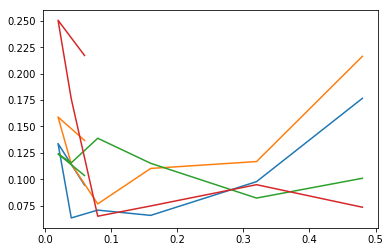

In [133]:
plt.plot(Hcoef, ndif3)
plt.plot(Hcoef, ndif2)
plt.plot(Hcoef, Ndif3)
plt.plot(Hcoef, Ndif2)

In [ ]:
for bk in test.range:
    #if not bk: continue
    basis = test.get_basis(7,bk)
    neig = nk.get_matrix(basis, eigen = True)[np.diag_indices(len(basis))]
    Neig = Nk.get_matrix(basis, eigen = True)[np.diag_indices(len(basis))]
    for val in neig[microwindow[0][ch][bk]]:
        micro_temp[0][0][bk]
        

In [18]:
index

[539, 1038, 406, 567]

In [12]:
initialstates = [Hinis[i].get_eigenstates(test.get_basis(7,0)) for i in range(4)]

In [243]:
nindex

[539, 526, 406, 508]

In [213]:
index

[539, 1038, 406, 567]

In [13]:
initial = [initialstates[i][index[i]] for i in range(4)]

In [187]:
initial

['None' state on sector (7, 0)
 t             : 0
 Energy        : [-0.70787896+0.j]
 State         : [[-3.00289776e-05+0.j]
  [-1.09461775e-04+0.j]
  [-2.55100184e-04+0.j]
  ...
  [ 1.06733051e-02+0.j]
  [-1.20430436e-02+0.j]
  [ 4.34366110e-03+0.j]]
 (eigen State) : [[-1.01138071e-03+0.j]
  [ 2.00953120e-04+0.j]
  [-1.91718191e-03+0.j]
  ...
  [-2.13207123e-17+0.j]
  [-1.89981351e-13+0.j]
  [-1.85525742e-04+0.j]], 'None' state on sector (7, 0)
 t             : 0
 Energy        : [-4.12284084+0.j]
 State         : [[ 0.00000000e+00+0.j]
  [ 7.24044215e-08+0.j]
  [ 3.34716787e-07+0.j]
  ...
  [-3.33703549e-02+0.j]
  [ 2.67668598e-02+0.j]
  [-1.69842642e-15+0.j]]
 (eigen State) : [[-2.27043462e-16+0.j]
  [-4.93358869e-16+0.j]
  [-1.26050077e-15+0.j]
  ...
  [-2.92790564e-15+0.j]
  [-5.84280391e-04+0.j]
  [-5.20825270e-13+0.j]], 'None' state on sector (7, 0)
 t             : 0
 Energy        : [2.10645045+0.j]
 State         : [[ 7.17508101e-08+0.j]
  [ 5.86183727e-07+0.j]
  [ 2.19615741

In [229]:
a = []
for i in range(4):
    test.Hamiltonian = Hfins[i]
    a.append(initial[i].time_evolving_states(np.arange(251)/2.5))

In [135]:
n_diags = [[]for i in range(4)]
N_diags = [[]for i in range(4)]
for k in test.range:
    for i in range(4):
        test.Hamiltonian = Hfins[i]
        initial[i].update()
        n_diags[i].append((initial[i].eigencoef*initial[i].eigencoef.conjugate()).T@(n[k].get_matrix(initial[i].basis, eigen=True)[np.diag_indices(len(initial[i].basis))]))
        N_diags[i].append((initial[i].eigencoef*initial[i].eigencoef.conjugate()).T@(N[k].get_matrix(initial[i].basis, eigen=True)[np.diag_indices(len(initial[i].basis))]))

In [14]:
n_diags = test.get_data("n_diags")
N_diags = test.get_data("N_diags")

In [137]:
n_diags, N_diags = np.array(n_diags),np.array(N_diags)

C:\Users\jeong\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


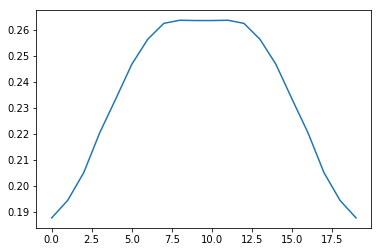

In [15]:
plt.plot(N_diags[0][1:])

In [85]:
test.Hamiltonian = Hfins[0]

In [92]:
test.Hamiltonian.name

'H_fin'

In [94]:
initial[0].coef 

array([[-3.00289776e-05+0.j],
       [-1.09461775e-04+0.j],
       [-2.55100184e-04+0.j],
       ...,
       [ 1.06733051e-02+0.j],
       [-1.20430436e-02+0.j],
       [ 4.34366110e-03+0.j]])

In [115]:
Hfins[].expectation(a[1][5])

array([[-3.57628828+6.9388939e-18j]])

In [74]:
n_k,N_k = [[] for i in range(4)],[[] for i in range(4)]
for i in range(4):
    test.Hamiltonian = Hfins[i]
    for k in test.range:
        state = initial[i].time_evolving_states(np.arange(251)/2.5)
        #a[i].update()
        n_k[i].append(n[k].expectation(state).real)
        N_k[i].append(N[k].expectation(state).real)

In [75]:
n_k = np.array(n_k)

N_k = np.array(N_k)

In [76]:
n_k.shape

(4, 21, 251)

In [216]:
dn_k = [abs(n_k[i]- n_diags[i]) for i in range(4)]

In [217]:
dN_k = [abs(N_k[i]- N_diags[i]) for i in range(4)]

In [63]:
E_sets[1][0]

-3.576442250140197

In [59]:
Hfins[1].get_eigenvalue(initials[1].basis)@(initials[1].eigencoef*initials[1].eigencoef.conjugate())

array([-3.57832545+0.j])

In [72]:
E_sets[0][0],E_sets[1][0],E_sets[2][0],E_sets[3][0]

(-3.853686973319782,
 -3.576442250140197,
 -3.436666389091025,
 -3.4029336835835804)

In [76]:
E

[0.0005787967403967365,
 0.00015396597702066472,
 0.0014922388646851914,
 0.004133136169813145]

In [79]:
ii = 3
Hfins[ii].get_eigenvalue(initial[ii].basis)@(initial[ii].eigencoef*initial[ii].eigencoef.conjugate())

array([-3.39880055+0.j])

In [245]:
test.data_list()

/data : dir
	E_can
	E_set
	N_diag
	N_diags
	N_k
	N_k0
	N_ks
	N{}
	beta
	n_a
	n_diag
	n_diags
	n_k
	n_k0
	n_ks
	n{}


In [196]:
n_k,N_k = [],[]
i = 1
test.Hamiltonian = Hfins[i]
state = Hinis[i].get_eigenstates(test.get_basis(7,0))[index[i]].time_evolving_states(np.arange(251)/2.5)
for k in test.range:
        #a[i].update()
    n_k.append(n[k].expectation(state).real)
    N_k.append(N[k].expectation(state).real)

In [558]:
n_ks, N_ks = np.array([n_ks, N_ks])

/data : dir
	E_can
	E_set
	N_diag
	N_diags
	N_k
	N_k0
	N_ks
	N{}
	beta
	n_a
	n_diag
	n_diags
	n_k
	n_k0
	n_ks
	n{}


In [128]:
(state[0].eigencoef*test.Hamiltonian.get_eigenvalue(state.basis)).sum()

(-144.65164062262798+0j)

In [136]:
test.Hamiltonian.get_eigenvalue(state.basis)

array([-14.62570057, -12.85439451, -11.4568701 , ...,   8.050854  ,
         8.30321423,   8.30321438])

In [144]:
(initial[0].eigencoef.T[0]*initial[0].eigencoef.T[0].conjugate()*test.Hamiltonian.get_eigenvalue(initial[0].basis)).sum()

(-3.777531026699405+0j)

In [145]:
(state[0].eigencoef.T[0]*state[0].eigencoef.T[0].conjugate()*test.Hamiltonian.get_eigenvalue(initial[0].basis)).sum()

(-3.777531026699407+0j)

In [ ]:
initial[0]

In [133]:
test.Hamiltonian.expectation(initial[0])

array([[-3.85426577+0.j]])

In [117]:
n[k].expectation(state[0])

array([[0.55507767+1.48210437e-16j]])

In [118]:
n[k].expectation(initial[i])

array([[0.48081966-1.0961284e-16j]])

In [156]:
state[0].coef

array([[-0.00247284+0.j],
       [-0.00445406+0.j],
       [-0.0001616 +0.j],
       ...,
       [ 0.04996141+0.j],
       [-0.00127084+0.j],
       [-0.03055507+0.j]])

In [153]:
test.Hamiltonian.get_eigenvectors(state.basis)@test.Hamiltonian.get_eigenvectors(state.basis).T@initial[0].coef

array([[-3.00289776e-05+0.j],
       [-1.09461775e-04+0.j],
       [-2.55100184e-04+0.j],
       ...,
       [ 1.06733051e-02+0.j],
       [-1.20430436e-02+0.j],
       [ 4.34366110e-03+0.j]])

In [158]:
test.Hamiltonian.get_eigenvectors(state.basis)@test.Hamiltonian.get_eigenvectors(state.basis).T@initial[0].coef

array([[-3.00289776e-05+0.j],
       [-1.09461775e-04+0.j],
       [-2.55100184e-04+0.j],
       ...,
       [ 1.06733051e-02+0.j],
       [-1.20430436e-02+0.j],
       [ 4.34366110e-03+0.j]])

In [165]:
test.Hamiltonian.get_eigenvectors(state.basis)@initial[0].coef

array([[ 0.01724558+0.j],
       [-0.00147849+0.j],
       [ 0.00073771+0.j],
       ...,
       [-0.01714024+0.j],
       [-0.00100102+0.j],
       [ 0.00070121+0.j]])

In [175]:
((test.Hamiltonian.get_eigenvectors(state.basis).T@initial[0].coef).T[0]*test.Hamiltonian.get_eigenvalue(state.basis) *(test.Hamiltonian.get_eigenvectors(state.basis).T@initial[0].coef).T[0]).sum()

(-3.854265770060179+0j)

In [154]:
test.Hamiltonian.get_eigenvectors(state.basis)@state[0].eigencoef

array([[-0.00247284+0.j],
       [-0.00445406+0.j],
       [-0.0001616 +0.j],
       ...,
       [ 0.04996141+0.j],
       [-0.00127084+0.j],
       [-0.03055507+0.j]])

In [172]:
state[0].eigencoef

array([[ 3.84173594e-04+0.j],
       [ 6.08019162e-05+0.j],
       [ 4.96026413e-04+0.j],
       ...,
       [ 2.21369087e-05+0.j],
       [ 2.77453241e-15+0.j],
       [-8.65061209e-05+0.j]])

In [157]:
initial[0].eigencoef

array([[ 3.84173594e-04+0.j],
       [ 6.08019162e-05+0.j],
       [ 4.96026413e-04+0.j],
       ...,
       [ 2.21369087e-05+0.j],
       [ 2.75893698e-15+0.j],
       [-8.65061209e-05+0.j]])

In [119]:
test.Hamiltonian.name

'H_fin'

In [197]:
n_k = np.array(n_k)

N_k = np.array(N_k)

In [105]:
n_k.shape

(21, 1, 1)

In [191]:
i=0

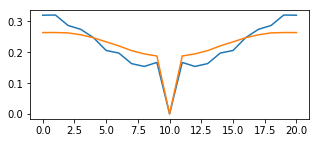

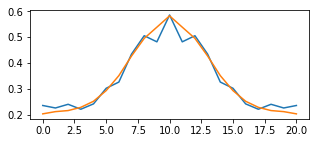

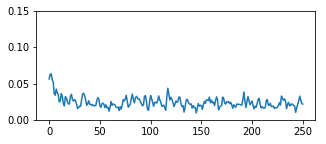

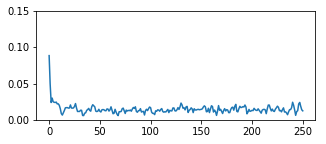

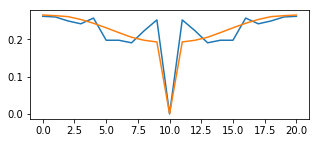

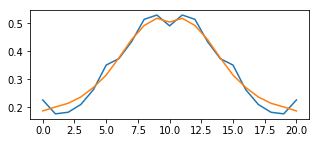

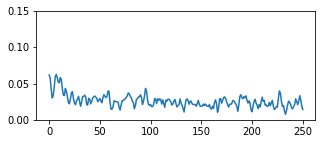

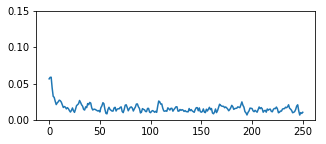

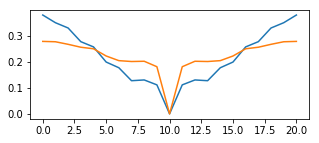

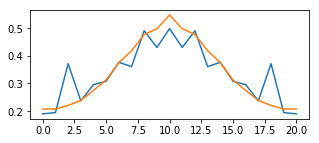

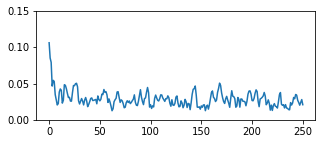

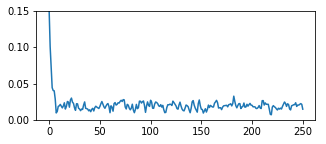

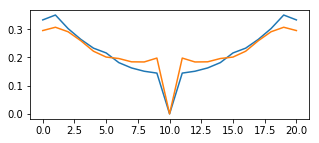

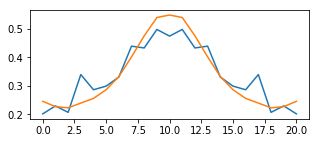

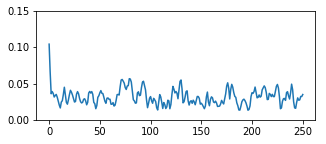

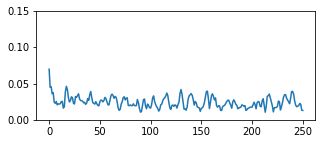

In [200]:
n_ks, N_ks =[],[]
for i in range(4):
    n_k,N_k = [],[]
    
    test.Hamiltonian = Hfins[i]
    state = Hinis[i].get_eigenstates(test.get_basis(7,0))[index[i]].time_evolving_states(np.arange(251)/2.5)
    for k in test.range:
            #a[i].update()
        n_k.append(n[k].expectation(state).real)
        N_k.append(N[k].expectation(state).real)
    n_k = np.array(n_k)

    N_k = np.array(N_k)
    
    Nkdp, Nkp = list(N_diags[i].T[0]),list(N_k.T[0])

    Nkdp.insert(1,0)
    Nkp.insert(1,0)
    Nkdp, Nkp = np.array(Nkdp[1:]),np.array(Nkp[1:])

    plt.figure(figsize=[5,2])
    plt.plot(np.roll(Nkp,10))
    plt.plot(np.roll(Nkdp,10))

    plt.figure(figsize=[5,2])
    plt.plot(np.roll(n_k.T[0],10))
    plt.plot(np.roll(n_diags[i],10))
    dk = np.abs(n_k - n_diags[i])
    plt.figure(figsize=[5,2])
    plt.plot(dk.sum(axis=0)/n_diags[i].sum())
    plt.ylim([0,0.15])
    Dk = np.abs(N_k - N_diags[i])
    plt.figure(figsize=[5,2])
    plt.plot(Dk.sum(axis=0)/N_diags[i].sum())
    plt.ylim([0,0.15])
    n_ks.append(n_k)
    N_ks.append(N_k)
    

In [101]:
Nkdp, Nkp = list(N_diags[1].T[0]),list(N_k[1].T[0][0])

Nkdp.insert(1,0)
Nkp.insert(1,0)
Nkdp, Nkp = np.array(Nkdp[1:]),np.array(Nkp[1:])

plt.figure(figsize=[5,2])
plt.plot(np.roll(Nkp,10))
plt.plot(np.roll(Nkdp,10))

plt.figure(figsize=[5,2])
plt.plot(np.roll(n_k[1].T[0][0],10))
plt.plot(np.roll(n_diags[1],10))

In [47]:
test.save('n_diags',n_diags)
test.save('N_diags',N_diags)

(4, 21, 1)

In [48]:
test.save('n_ks',n_k)
test.save('N_ks',N_k)

In [201]:
dn_k = [np.abs(n_ks[i] - n_diags[i]) for i in range(4)]

In [207]:
dN_k = [np.abs(N_ks[i][1:] - N_diags[i][1:]) for i in range(4)]

In [48]:
plt.figure(figsize=[5,2])
plt.plot(dn_k.sum(axis = 0)/n_diags[0].sum())
plt.ylim([0,0.15])

AttributeError: 'list' object has no attribute 'sum'

<Figure size 360x144 with 0 Axes>

In [183]:
plt.figure(figsize=[5,2])
plt.plot(dN_k.sum(axis = 0)/N_diags[0].sum())
plt.ylim([0,0.15])

AttributeError: 'list' object has no attribute 'sum'

<Figure size 360x144 with 0 Axes>

In [51]:
dn_k = [abs(n_k[i].T- n_diags[i].reshape(-1)) for i in range(4)]

In [206]:
dN_k = [abs(N_k[i].T[1:]- N_diags[i][1:].reshape(-1)) for i in range(4)]

ValueError: operands could not be broadcast together with shapes (250,) (20,) 

In [196]:
dn_k, dN_k = np.array(dn_k),np.array(dN_k)

In [66]:
dn_k[0].shape

(251, 21)

In [67]:
n_diags.shape

(4, 21, 1)

In [55]:
N_diags.shape

(4, 21, 1)

In [123]:
ind = 1
test.Hamiltonian = Hfins[1]
E_sets[1][0]

-3.576442250140197

In [131]:
j = 0
E = [10 for i in range(4)]
nindex = [0 for i in range(4)]
for energy in Energys:
    for i,e in enumerate(energy):
        if e-E_sets[j][0]<0 and E[j]>abs(e-E_sets[j][0]):
            E[j] = abs(e-E_sets[j][0])
            nindex[j] = i
    j+=1

In [144]:
nindex

[539, 526, 406, 508]

In [145]:
index

[539, 1038, 406, 567]

In [ ]:
ind = 2
test.Hamiltonian = Hfins[ind]

E = 10
j = 0
for energy in Energys[ind]:
    for i, e in enumerate(energy):
        if e-E_sets[j][0]<0 and E>abs(e-E_sets[j][0]):
            E = abs(e-E_sets[j][0])
            j = i
initial1 = Hinis[ind].get_eigenstates(test.get_basis(7,0))[j]
print(E, j)
print(initial1.energy)




In [424]:
gs_top = plt.GridSpec(5, 1, top=0.95)
gs_base = plt.GridSpec(5, 1, hspace=0)
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

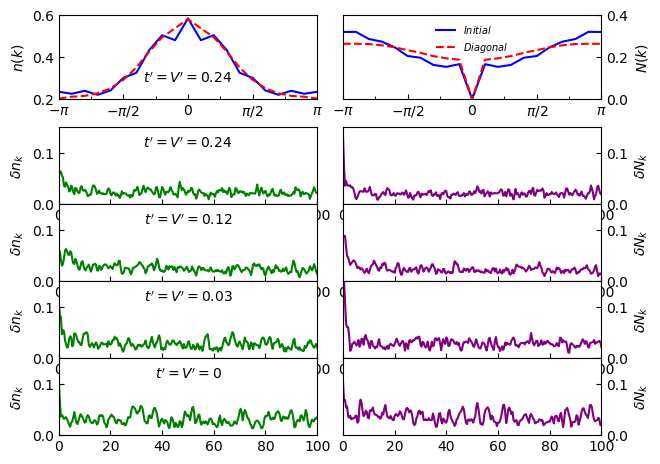

In [499]:
fig = plt.figure(figsize = [7,5])
gs_top = plt.GridSpec(5, 2, top=0.95,hspace = 0, wspace = 0.1)
gs_base = plt.GridSpec(5, 2, hspace=0,wspace = 0.1)
topax1 = fig.add_subplot(gs_top[0,0])
topax1.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(n_ks[0].T[0],10),c='b',linewidth=1.5)
topax1.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(n_diags[0],10),'r--',linewidth=1.5)
topax1.set_xlim([-np.pi,np.pi])
topax1.set_ylim([0.2,0.6])
topax1.yaxis.set_tick_params(direction = 'in', which='both')
topax1.xaxis.set_tick_params(direction = 'in', which='both')
topax1.xaxis.set_major_formatter(plt.FixedFormatter(['','$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']))
topax1.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
topax1.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
topax1.set_ylabel(r"$n(k)$")
topax1.text(  # position text relative to Axes
    0.5, 0.25, r"$t' = V' = 0.24$",
    ha='center', va='center',
    transform=topax1.transAxes
)

topax2 = fig.add_subplot(gs_top[0,1])
plotN = list(N_ks[0].T[0])
plotNd = list(N_diags[0].reshape(-1))
plotN.insert(1,0)
plotNd.insert(1,0)
plotN = np.array(plotN)[1:]
plotNd = np.array(plotNd)[1:]
topax2.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(plotN,10),c='b',linewidth=1.5,label=r'${Initial}$')
topax2.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(plotNd,10),'r--',linewidth=1.5,label=r'${Diagonal}$')
topax2.set_xlim([-np.pi,np.pi])
topax2.set_ylim([0,0.4])
topax2.yaxis.set_ticks_position('right')
topax2.yaxis.set_tick_params(direction = 'in', which='both')
topax2.xaxis.set_tick_params(direction = 'in', which='both')
topax2.xaxis.set_major_formatter(plt.FixedFormatter(['','$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']))
topax2.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
topax2.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
topax2.set_ylabel(r"$N(k)$")
topax2.yaxis.set_label_position('right')
leg = topax2.legend(loc=9,fontsize = 7)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
nnnlabel = [0.24,0.12,0.03,0]
for i in range(4):
    
    if i:
        axes1 = fig.add_subplot(gs_base[i+1,0], sharex=axes1)
    else:
        axes1 = fig.add_subplot(gs_base[i+1,0])
    #axes.subplot(5,2,3+2*i)
    axes1.plot(np.arange(251)/2.5,dn_k[i].sum(axis=0)/n_diags[i].reshape(-1).sum(),c='green',linewidth=1.5)
    axes1.set_ylim([0,0.15])
    axes1.set_xlim([0,100])
    axes1.yaxis.set_tick_params(direction = 'in', which='both')
    axes1.xaxis.set_tick_params(direction = 'in', which='both')
    axes1.set_ylabel(r"$\delta n_k$")
    axes1.text(  # position text relative to Axes
    0.5, 0.8, r"$t' = V' = {}$".format(nnnlabel[i]),
    ha='center', va='center',
    transform=axes1.transAxes
    )
    #if not i == 1:
        #axes1.xaxis.set_major_formatter(plt.NullFormatter())

    #axes.subplot(5,2,4+2*i)
    if i:
        axes2 = fig.add_subplot(gs_base[i+1,1], sharex=axes2)
    else:
        axes2 = fig.add_subplot(gs_base[i+1,1])
    axes2.plot(np.arange(251)/2.5,dN_k[i].sum(axis=0)/N_diags[i][1:].reshape(-1).sum(),c='purple',linewidth=1.5)
    axes2.yaxis.set_ticks_position('right')
    axes2.set_ylim([0,0.15])
    axes2.set_xlim([0,100])
    axes2.yaxis.set_tick_params(direction = 'in', which='both')
    axes2.xaxis.set_tick_params(direction = 'in', which='both')
    axes2.yaxis.set_label_position('right')
    axes2.set_ylabel(r"$\delta N_k$")
    #if not i == 1:
        #axes2.xaxis.set_major_formatter(plt.NullFormatter())

plt.savefig('FIG1.png')

C:\Users\jeong\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 100)

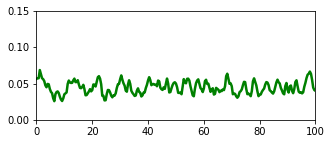

In [125]:
plt.figure(figsize=[5,2])
plt.plot(np.arange(251)/2.5,dn_k[0].sum(axis=0)/n_diags[0].sum(),c='green',linewidth=2.5)
plt.ylim([0,0.15])
plt.xlim([0,100])

(0, 100)

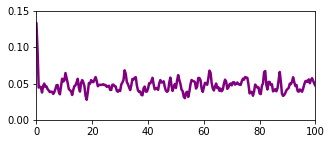

In [109]:
plt.figure(figsize=[5,2])
plt.plot(np.arange(251)/2.5,dN_k[0].sum(axis=0)/N_diags[0][1:].sum(),c='purple',linewidth=2.5)
plt.ylim([0,0.15])
plt.xlim([0,100])

In [7]:
test.Hamiltonian = test.get_operator("H_fin")

In [8]:
init = test.get_operator("H_ini").get_eigenstates(test.get_basis(7,0))

In [9]:
initial = init[539]

In [160]:
plt.plot(all)

In [212]:
Hfins[2]

In [218]:
E_sets[2][0]

-3.436666389091025

In [223]:
np.average(np.array([1,2,3]))

2.0

In [225]:
Hfins[2].expectation(initial[2])

array([[-3.43815863+0.j]])

In [242]:
DE = [0.05,0.10,0.15]
micro = [[[] for i in test.range] for i in range(3)]
n_0 = []
for k in test.range:
    E = Hfins[2].get_eigenvalue(test.get_basis(7,k))
    for kk in test.range:
        nk = n[kk].expectation(Hfins[2].get_eigenstates(test.get_basis(7,k)))
        if kk ==0:
            for val in nk:
                n_0.append(val)
        for i in range(3):
            micro[i][kk].append(nk[np.logical_and(E>E_sets[2][0] - DE[i], E<E_sets[2][0] + DE[i])])
        
            
                
        

In [504]:
micro = np.array(micro)

In [511]:
micro[0].shape

(21, 21)

In [528]:
resort = [[[]for k in test.range] for i in range(3)]

In [529]:
for i in range(3):
    for k in test.range:
        for basis_k in test.range:
            for comp in micro[i][k][basis_k]:
                resort[i][k].append(comp)

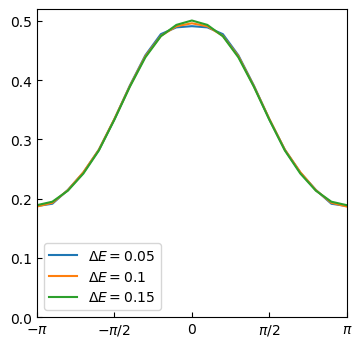

In [551]:
fig = plt.figure(figsize = [4,4])
for i in range(3):
    plt.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(np.array([np.average(resort[i][k]) for k in test.range]),10),label = r'$\Delta E = {}$'.format(DE[i]))
plt.ylim([0,0.52])
plt.xlim([-np.pi, np.pi])
plt.legend()
plt.tick_params(direction = 'in', which='both')
plt.xticks(np.arange(5)*np.pi/2-np.pi,['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
#fig.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
#fig.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
plt.savefig('micro.png')

In [244]:
len(n_0)

116280

In [247]:
fenergy = []
for k in test.range:
    for e in Hfins[2].get_eigenvalue(test.get_basis(7,k)):
        fenergy.append(e)

In [249]:
len(fenergy)

116280

In [ ]:
DE = [0.05,0.10,0.15]
microN = [[[] for i in test.range] for i in range(3)]
#n_0 = []
for k in test.range:
    E = Hfins[2].get_eigenvalue(test.get_basis(7,k))
    for kk in test.range:
        nk = N[kk].expectation(Hfins[2].get_eigenstates(test.get_basis(7,k)))
        #if kk ==0:
        #    for val in nk:
        #        n_0.append(val)
        for i in range(3):
            microN[i][kk].append(nk[np.logical_and(E>E_sets[2][0] - DE[i], E<E_sets[2][0] + DE[i])])
        
            
                
        

In [162]:
n_aa = np.array(n_aa)
n_aa = n_aa.reshape(-1)

In [166]:
n_a = []
for n_aak in n_aa:
    for nnn in n_aak:
        n_a.append(nnn)

In [163]:
all_energy = []
for k in test.range:
    for e in test.Hamiltonian.get_eigenvalue(test.get_basis(7,k)):
        all_energy.append(e)

In [162]:
n_aa = np.array(n_aa)
n_aa = n_aa.reshape(-1)

In [259]:
all_energy = []
for k in test.range:
    for e in Hfins[0].get_eigenvalue(test.get_basis(7,k)):
        all_energy.append(e)

In [176]:
n_a = np.array(n_a)

In [177]:
test.save('n_a',n_a)

In [256]:
n_a = test.get_data('n_a')

In [287]:
plt.style.use('default')

In [354]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=False)

In [356]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [552]:
Hfins[0].latex

<font size ="4"> $$H_{fin} = \sum_i^L -t\left(b^\dagger_{i+1}b_i + b^\dagger_{i}b_{i+1}  \right)
+V\left(n_i - \frac{1}{2}\right)\left(n_{i+1}  - \frac{1}{2}\right)\\
-t'\left(b^\dagger_{i+2}b_i + b^\dagger_{i}b_{i+2}  \right)
+V'\left(n_i - \frac{1}{2}\right)\left(n_{i+2}  - \frac{1}{2}\right)\\
(t=1.0,V=1.0, \quad t'=V'=0.24)$$

In [553]:
Hinis[0].latex

<font size ="4"> $$H_{ini} = \sum_i^L -t\left(b^\dagger_{i+1}b_i + b^\dagger_{i}b_{i+1}  \right)
+V\left(n_i - \frac{1}{2}\right)\left(n_{i+1}  - \frac{1}{2}\right)\\
-t'\left(b^\dagger_{i+2}b_i + b^\dagger_{i}b_{i+2}  \right)
+V'\left(n_i - \frac{1}{2}\right)\left(n_{i+2}  - \frac{1}{2}\right)\\
(t=0.5,V=2.0, \quad t'=V'=0.24)$$

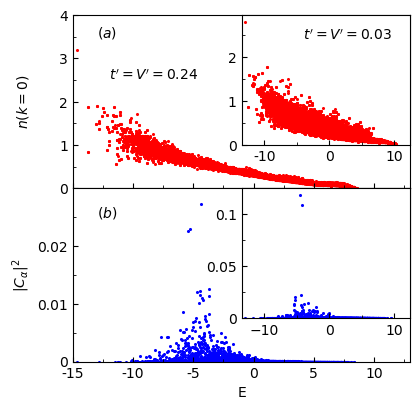

In [423]:
fig = plt.figure(figsize = [4.5,4.5])
axs = fig.subplots(2,1, sharex=True,gridspec_kw={'hspace': 0})
plt.tick_params(direction='in')
fig.subplots_adjust(left=0.15,right=0.9)
#ax.set_xticks([])
#ax.set_yticks([])
#axs = [fig.add_subplot(2,1,1),fig.add_subplot(2,1,2)]
#fig.subplots_adjust(hspace=0)
scattersize = 1.5
axs[0].scatter(all_energy, n_a, c='r',s=scattersize)
axs[0].set_ylim([0,4])
axs[0].set_xlim([-15,13])
axs[0].yaxis.set_tick_params(direction = 'in', which='both')
axs[0].xaxis.set_tick_params(direction='in', which='both')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].xaxis.set_minor_locator(plt.MultipleLocator(2.5))
axs[0].xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
axs[0].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
axs[0].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].set_ylabel(r"$n(k=0)$", labelpad=20)
axs[0].text(-13,3.5,"$(a)$")
axs[0].text(-12,2.5,"$t'=V'=0.24$")


axins = inset_axes(axs[0],width='50%', height='75%', borderpad=0)
axins.scatter(fenergy,n_0,c='r',s=scattersize)
axins.yaxis.set_tick_params(direction = 'in', which='both')
axins.xaxis.set_tick_params(direction='in', which='both')
axins.xaxis.set_major_locator(plt.MultipleLocator(10))
axins.xaxis.set_minor_locator(plt.MultipleLocator(5))
axins.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
axins.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
axins.yaxis.set_major_locator(plt.MultipleLocator(1))
axins.text(-4,2.4,"$t'=V'=0.03$")
axins.set_ylim([0,2.95])
axins.set_xlim([-13.5,12.5])

axs[1].scatter(test.get_operator("H_fin").get_eigenvalue(initial[0].basis),(Hfins[0].get_eigenvectors(initial[0].basis).T@initial[0].coef)**2,c='b',s = scattersize)
axs[1].xaxis.set_tick_params(direction='in', which='both')
axs[1].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.01))
axs[1].yaxis.set_major_formatter(plt.FixedFormatter(['0','0.01','0.02','']))
axs[1].yaxis.set_ticks([0,0.01,0.02])
axs[1].yaxis.set_tick_params(direction='in', which='both')
axs[1].set_ylim([0,0.03])
axs[1].set_xlim([-15,13])
axs[1].set_ylabel(r"$|C_\alpha|^2$")
axs[1].text(-13,0.025,"$(b)$")
axs[1].set_xlabel("E")

axins1 = inset_axes(axs[1],width='50%', height='75%', borderpad=0)
axins1.scatter(Hfins[2].get_eigenvalue(initial[2].basis),(Hfins[2].get_eigenvectors(initial[2].basis).T@initial[2].coef)**2,c='b',s = scattersize)
axins1.yaxis.set_tick_params(direction = 'in', which='both')
axins1.xaxis.set_tick_params(direction='in', which='both')
axins1.xaxis.set_major_locator(plt.MultipleLocator(10))
axins1.xaxis.set_minor_locator(plt.MultipleLocator(5))
axins1.yaxis.set_major_formatter(plt.FixedFormatter(['','0','0.05','0.1']))
axins1.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
axins1.yaxis.set_major_locator(plt.MultipleLocator(0.05))

axins1.set_ylim([0,0.125])
axins1.set_xlim([-13.5,12.5])

fig.savefig('fig6.png')

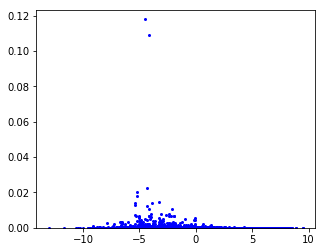

In [262]:
plt.figure(figsize = [5,4])
plt.scatter(Hfins[2].get_eigenvalue(initial[2].basis),(Hfins[2].get_eigenvectors(initial[2].basis).T@initial[2].coef)**2,c='b',s = 4)
plt.ylim([0,0.123])
plt.savefig("fig6insetb.png")

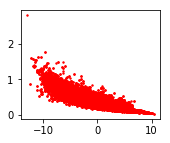

In [254]:
plt.figure(figsize = [2.5,2])
plt.scatter(fenergy,n_0,c='r',s=2)

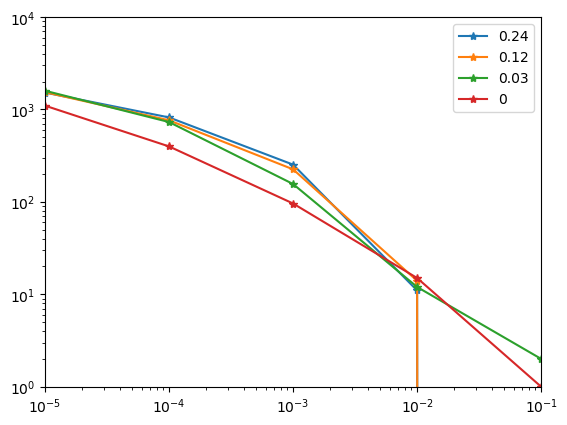

In [503]:
mask = [1e-5,1e-4,1e-3,1e-2,1e-1]

c_a_square = [(Hfins[i].get_eigenvectors(initial[i].basis).T@initial[i].coef)**2 for i in range(4)]
for j in range(4):
    plt.loglog(mask,[c_a_square[j][c_a_square[j]>mask[i]].shape[0] for i in range(5)],'*-', label=str(nnnlabel[j]))
plt.xlim([1e-5,1e-1])
plt.ylim([1,1e4])
plt.legend()

(-15, 13)

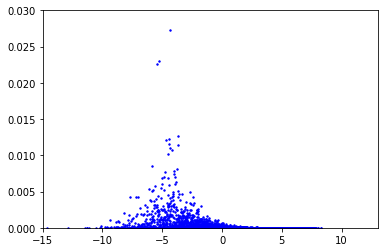

In [149]:
plt.scatter(test.get_operator("H_fin").get_eigenvalue(initial.basis),(initial.eigencoef*initial.eigencoef.conjugate()),c='b',s = 2)
plt.ylim([0,0.03])
plt.xlim([-15,13])


In [10]:
initial.eigencoef.shape

(5538, 1)

In [12]:
n_diag = test.get_data('n_diag')

In [13]:
N_diag = test.get_data('N_diag')

In [75]:
a= initial.time_evolving_states(np.arange(251)/2.5)

In [76]:
n_k,N_k = [],[]
for k in test.range:
    n_k.append(n[k].expectation(a).real)
    N_k.append(N[k].expectation(a).real)

In [78]:
n_k = np.array(n_k)

N_k = np.array(N_k)

In [79]:
dn_k = abs(n_k.T- n_diag)

In [70]:
N_k.shape

(21, 401)

In [80]:
dN_k = abs(N_k[1:].T- N_diag[21:])

In [90]:
n_k.T[0]

array([0.58433563, 0.48081966, 0.50438354, 0.43350949, 0.32551843,
       0.30148072, 0.2412598 , 0.2206171 , 0.239704  , 0.22547819,
       0.23506125, 0.23506125, 0.22547819, 0.239704  , 0.2206171 ,
       0.2412598 , 0.30148072, 0.32551843, 0.43350949, 0.50438354,
       0.48081966])

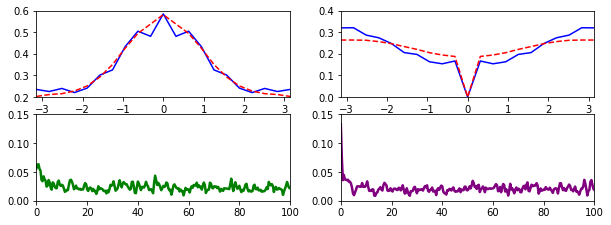

In [131]:
plt.figure(figsize = [10,3.5])
plt.subplot(2,2,1)
plt.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(n_k.T[0],10),c='b',linewidth=1.5)
plt.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(n_diag,10),'r--',linewidth=1.5)
plt.xlim([-np.pi,np.pi])
plt.ylim([0.2,0.6])

plt.subplot(2,2,2)
plotN = list(N_k.T[0])
plotN.insert(1,0)
plotN = np.array(plotN)[1:]
plt.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(plotN,10),c='b',linewidth=1.5)
plt.plot((np.arange(21)*2*np.pi/20-np.pi),np.roll(N_diag[1:],10),'r--',linewidth=1.5)
plt.xlim([-np.pi,np.pi])
plt.ylim([0,0.4])

plt.subplot(2,2,3)
plt.plot(np.arange(251)/2.5,dn_k.sum(axis=1)/n_diag.sum(),c='green',linewidth=2.5)
plt.ylim([0,0.15])
plt.xlim([0,100])

plt.subplot(2,2,4)
plt.plot(np.arange(251)/2.5,dN_k.sum(axis=1)/N_diag[1:].sum(),c='purple',linewidth=2.5)
plt.ylim([0,0.15])
plt.xlim([0,100])

plt.savefig('d24.png')

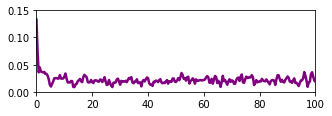

In [126]:
plt.figure(figsize = [5,1.5])
plt.plot(np.arange(251)/2.5,dN_k.sum(axis=1)/N_diag[1:].sum(),c='purple',linewidth=2.5)
plt.ylim([0,0.15])
plt.xlim([0,100])
plt.savefig('dNk24.png')

In [44]:
n_diag = []
N_diag = []
for k in test.range:
    n_diag.append((initial.eigencoef*initial.eigencoef.conjugate()).T@(n[k].get_matrix(initial.basis, eigen=True)[np.diag_indices(len(initial.basis))]))
    N_diag.append((initial.eigencoef*initial.eigencoef.conjugate()).T@(N[k].get_matrix(initial.basis, eigen=True)[np.diag_indices(len(initial.basis))]))

In [18]:
N_diag = []
for k in test.range:
    N_diag.append(np.sum((initial.eigencoef*initial.eigencoef.conjugate())@(N[k].get_matrix(initial.basis, eigen=True)[np.diag_indices(len(initial.basis))]))

(5538,)

In [9]:
H_ini= test.get_operator("H_ini")#get_eigenvectors(test.get_basis(7,0))

In [22]:
B_aA = test.Hamiltonian.get_eigenvectors(test.get_basis(7,0))

In [23]:
(B_aA.imag==0).all()

True

In [29]:
I = (B_aA.T.real@B_aA.real)

In [30]:
I[np.diag_indices(5538)] = 0

In [35]:
tn = []
tN = []
for k in test.range:
    tn.append(B_aA.T@n[k].get_matrix(test.get_basis(7,0))@B_aA)
    tN.append(B_aA.T@N[k].get_matrix(test.get_basis(7,0))@B_aA)

In [56]:
np.array(range(10)).reshape(-1,1)@np.array(range(10)).reshape(1,-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [38]:
(tn[0] == tn[1]).all()

True

In [ ]:
plt.plot(n[1].get_matrix(initial.basis).reshape(-1,1),'x')

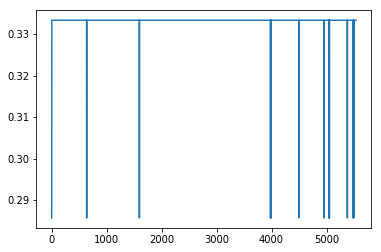

In [36]:
plt.plot(n[0].get_matrix(initial.basis)[np.diag_indices(len(initial.basis))])

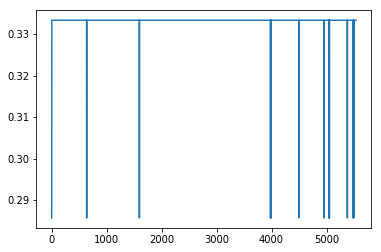

In [35]:
plt.plot(n[2].get_matrix(initial.basis)[np.diag_indices(len(initial.basis))])

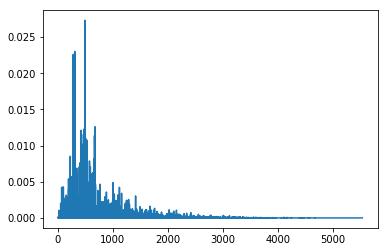

In [26]:
plt.plot(initial.eigencoef*initial.eigencoef.conjugate())

In [39]:
n[1].coef.shape

(441,)

In [24]:
n_diag

[(0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j),
 (0.5374714760368672+1.4116277447675007e-17j)]

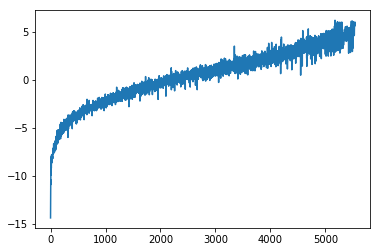

In [7]:
plt.plot(energy.real)

In [8]:
def partition_f(H,beta):
    return np.exp(-H*beta)

def temper(func, beta):
    def wrapper(x):
        return func(x,beta)
    return wrapper

In [9]:
H_ini = test.get_operator('H_ini')
H_fin = test.get_operator('H_fin')

In [10]:
H_ini.latex

<font size ="4"> $$H_{ini} = \sum_i^L -t\left(b^\dagger_{i+1}b_i + b^\dagger_{i}b_{i+1}  \right)
+V\left(n_i - \frac{1}{2}\right)\left(n_{i+1}  - \frac{1}{2}\right)\\
-t'\left(b^\dagger_{i+2}b_i + b^\dagger_{i}b_{i+2}  \right)
+V'\left(n_i - \frac{1}{2}\right)\left(n_{i+2}  - \frac{1}{2}\right)\\
(t=0.5,V=2.0, \quad t'=V'=0.24)$$

In [11]:
H_fin.latex

<font size ="4"> $$H_{fin} = \sum_i^L -t\left(b^\dagger_{i+1}b_i + b^\dagger_{i}b_{i+1}  \right)
+V\left(n_i - \frac{1}{2}\right)\left(n_{i+1}  - \frac{1}{2}\right)\\
-t'\left(b^\dagger_{i+2}b_i + b^\dagger_{i}b_{i+2}  \right)
+V'\left(n_i - \frac{1}{2}\right)\left(n_{i+2}  - \frac{1}{2}\right)\\
(t=1.0,V=1.0, \quad t'=V'=0.24)$$

In [12]:
beta = test.get_data('beta')
E_set = test.get_data('E_set')
E_can = test.get_data('E_can')

Text(0, 0.5, '<E>')

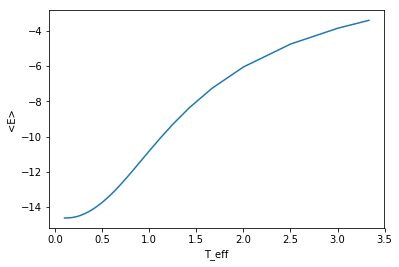

In [13]:
plt.plot(1/beta, E_set)
plt.xlabel(r"T_eff")
plt.ylabel(r"<E>")

In [14]:
E_can

array([[338.        ,  -3.8577188 ],
       [346.        ,  -3.8543834 ],
       [390.        ,  -3.84382674],
       [397.        ,  -3.85488533],
       [403.        ,  -3.85046932],
       [432.        ,  -3.85117252],
       [452.        ,  -3.85561018],
       [539.        ,  -3.85426577]])

operator group

In [46]:
n_k = test.get_data('n_k')
N_k = test.get_data('N_k')

In [57]:
test.save("n_diag",np.array(n_diag))
test.save("N_diag",np.array(N_diag))

In [59]:
for i in test.range:
    test.save("n{}".format(i),n[i].matrix)
    test.save("N{}".format(i),n[i].matrix)

(-3.141592653589793, 3.141592653589793)

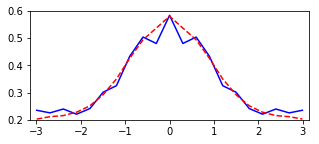

In [49]:
k = np.arange(21)*np.pi*2/test.size-np.pi*2/test.size*10
plt.figure(figsize=[5,2])
plt.plot(k, np.roll(n_k.T[539].real,10),'b-')
plt.plot(k, np.roll(np.array(n_diag).real,10),'r--')
plt.ylim([0.2,0.6])
plt.xlim([-np.pi, np.pi])
#plt.savefig('n_k.png')

(-3.141592653589793, 3.141592653589793)

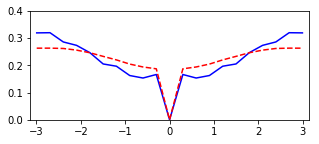

In [53]:
N_k_t = list(N_k.T[539].real)[1:]

N_k_t.insert(0,0)
#N_diag.insert(1,0)  
N_k_t = np.array(N_k_t)
N_diag = np.array(N_diag)[1:]
plt.figure(figsize=[5,2])
plt.plot(k, np.roll(N_k_t,10),'b-')
plt.plot(k, np.roll(N_diag[1:],10),'r--')
plt.ylim([0,0.4])
plt.xlim([-np.pi, np.pi])
#plt.savefig('NK.png')

xxz.preset(test, globals())

n = []
for k in test.range:
    n.append(xxz.Operator.Null(test))
    for i in test.range:
        for j in test.range:
            n[k]+= np.exp(-k*2*np.pi/test.size*1j*(i-j))/test.size*b_i_dag.index(i)@b_i.index(j)